In [1]:
import sys
import platform
import numpy as np
import matplotlib.pyplot as plt
if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/subin/data'
    cpuserver_data_FP = '/Users/subin/cpuserver_data'
elif platform.system() == 'Linux':
    base_FP = '/home/subin/data'
    cpuserver_data_FP = '/home/subin/cpuserver_data'
else:
    base_FP = '/home/subin/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')
print(base_FP, cpuserver_data_FP)

/home/subin/data /home/subin/cpuserver_data


In [8]:
def read_xy_file_binary(filename):
    try:
        # Read file in binary mode
        with open(filename, 'rb') as f:
            data = np.fromfile(f)
            # Assuming the data is stored as pairs of float32 or float64
            # Try float32 first
            try:
                data = data.reshape(-1, 2)  # Reshape into 2 columns
                return data[:, 0], data[:, 1]
            except:
                print("Failed to reshape data. Trying different data type...")
                return None
    except Exception as e:
        print(f"Error reading binary file: {e}")
        return None

# Usage
file_path = f"{cpuserver_data_FP}/VISEA/2023/ET20231231.xy"
result = read_xy_file_binary(file_path)
if result is not None:
    x, y = result
    print("First 5 rows of data:")
    for i in range(min(5, len(x))):
        print(f"X: {x[i]}, Y: {y[i]}")

First 5 rows of data:
X: -99.0, Y: -99.0
X: -99.0, Y: -99.0
X: -99.0, Y: -99.0
X: -99.0, Y: -99.0
X: -99.0, Y: -99.0


Before reshape:  (12960000,) (12960000,)
After reshape:  (3600, 3600) (3600, 3600)
After combine:  (3600, 7200)


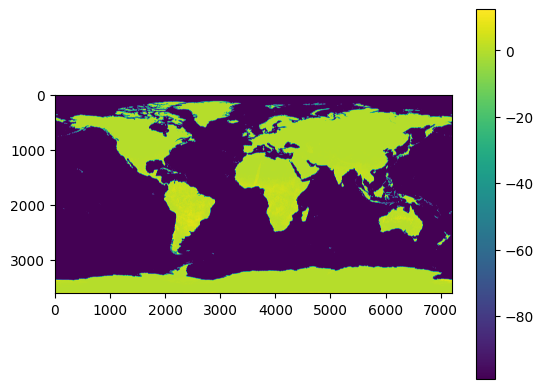

In [9]:
# Before reshape
print('Before reshape: ', np.shape(x), np.shape(y))

# After reshape
x_reshape = x.reshape(3600, 3600)
y_reshape = y.reshape(3600, 3600)
print('After reshape: ', np.shape(x_reshape), np.shape(y_reshape))

# Combine x and y
xy_combined = np.full((3600, 7200), np.nan)
xy_combined[:, ::2] = x_reshape     # Stack x firstly
xy_combined[:, 1::2] = y_reshape    # Stack y secondly
print('After combine: ', np.shape(xy_combined))

plt.imshow(xy_combined)
plt.colorbar()
plt.show()